In [4]:
"""

"""


import pandas as pd
import matplotlib.pyplot as plt

import __init__

from db.pgdf import PgDf
from db.postgresql import PostgreSqlDB

d = PostgreSqlDB()
pg = PgDf()

df = pg.read_sql("""SELECT 
CASE 
WHEN t.result = 'lose' THEN -1
WHEN t.result = 'win' THEN 1
    ELSE 0
END AS dir,
z.*
FROM zz_strtg_params as z
JOIN trades as t ON t.order_id = z.order_id
WHERE t.trade_name = 'zzstrat_top3000vol2'
AND abs(t.profit) > 0
AND t.side = 1
;""")



In [5]:
print("total: %d" % len(df))
print("up  :  %d" % len(df[df.dir == 1]))
print("down:  %d" % len(df[df.dir == -1]))


total: 3280
up  :  1653
down:  1627


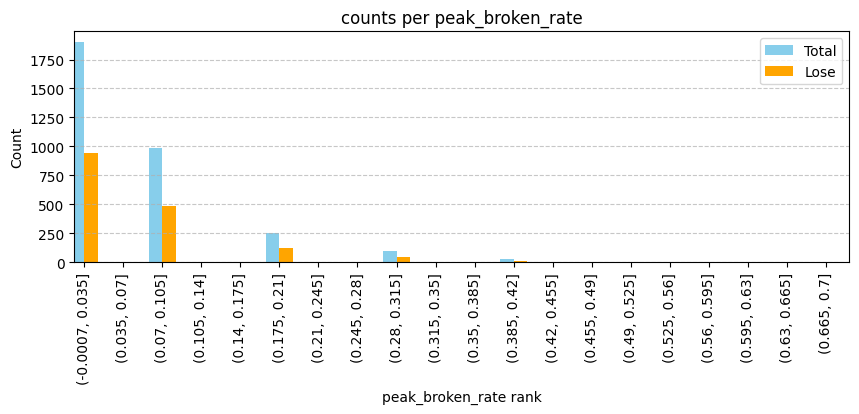

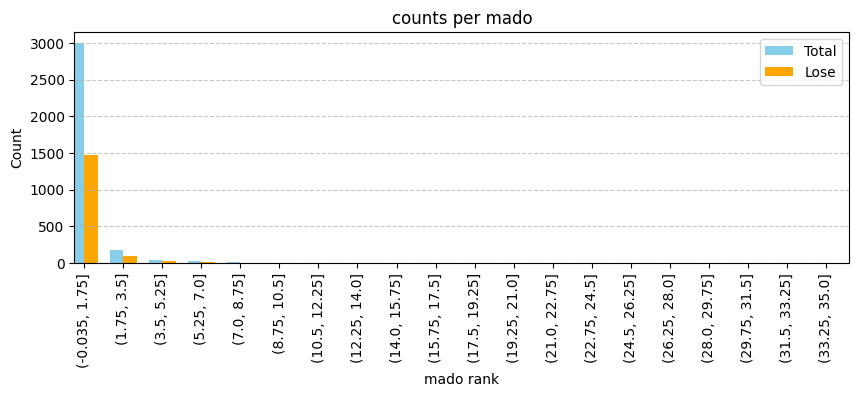

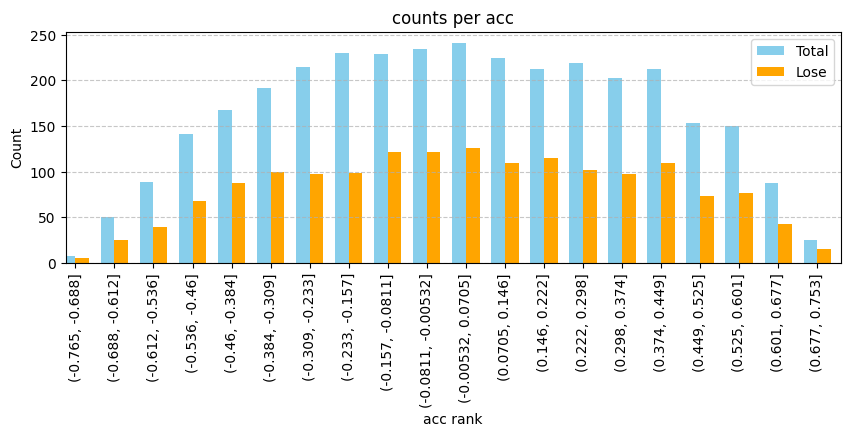

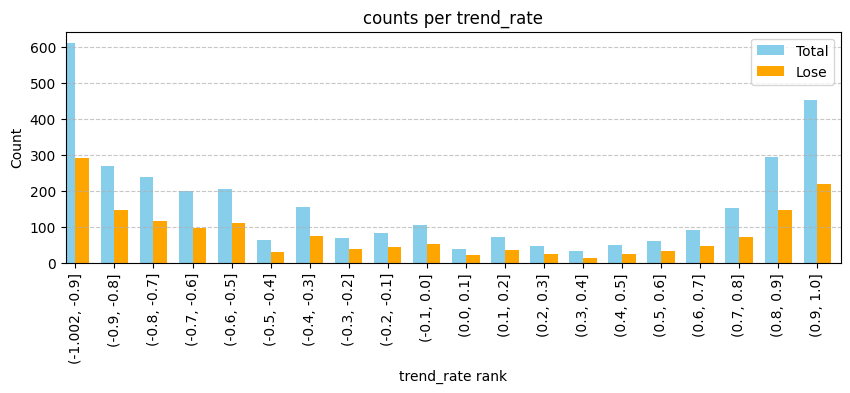

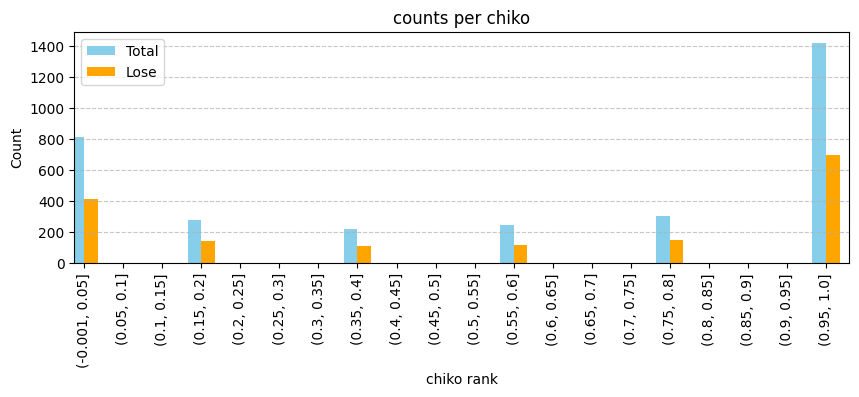

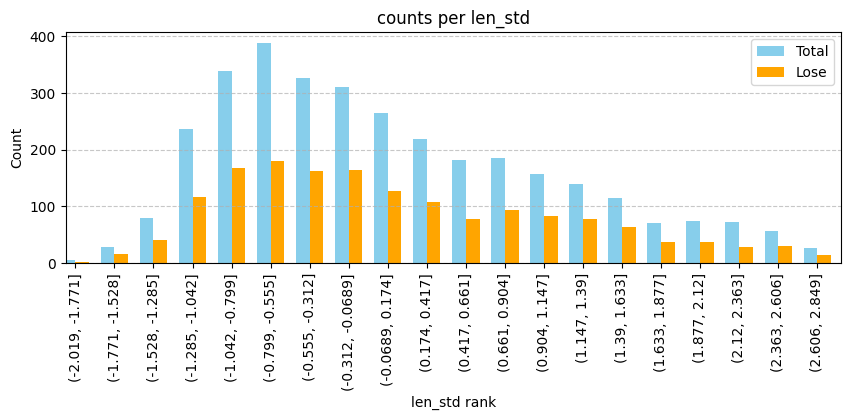

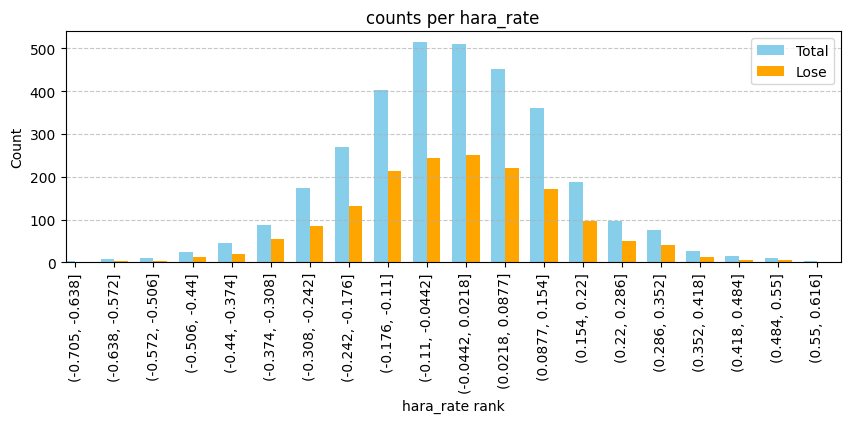

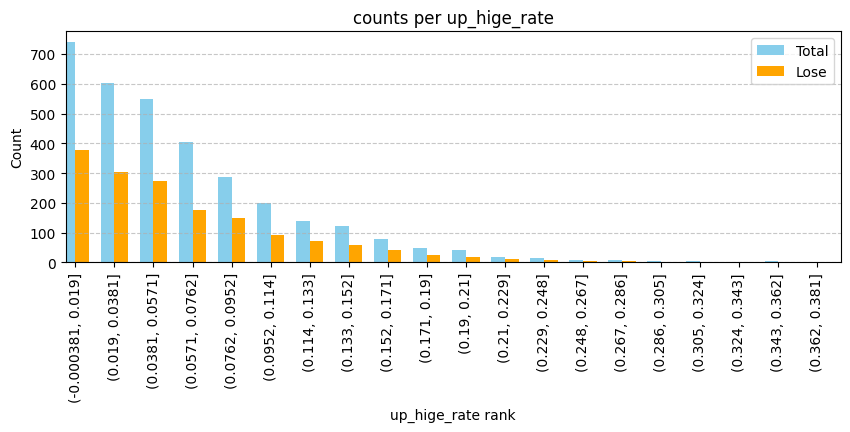

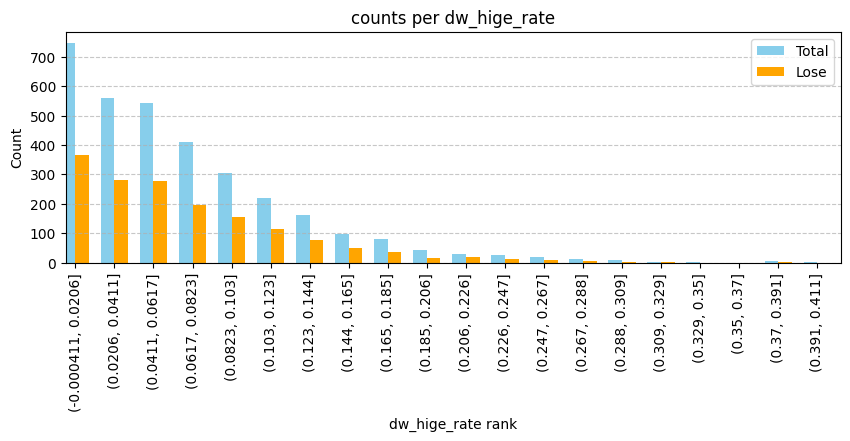

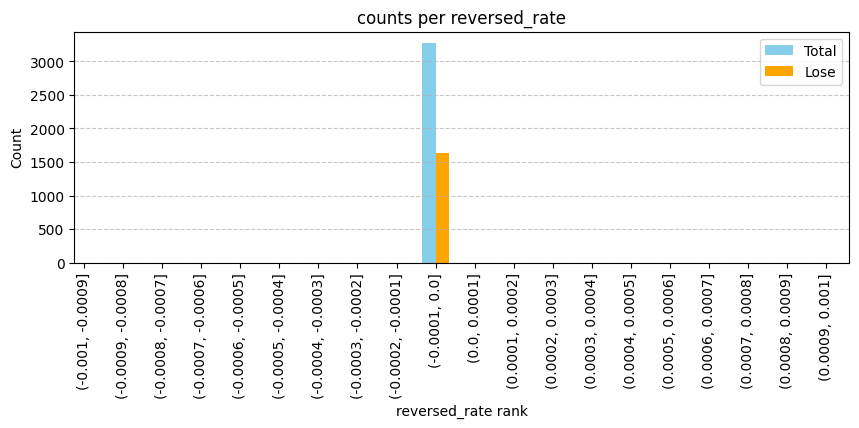

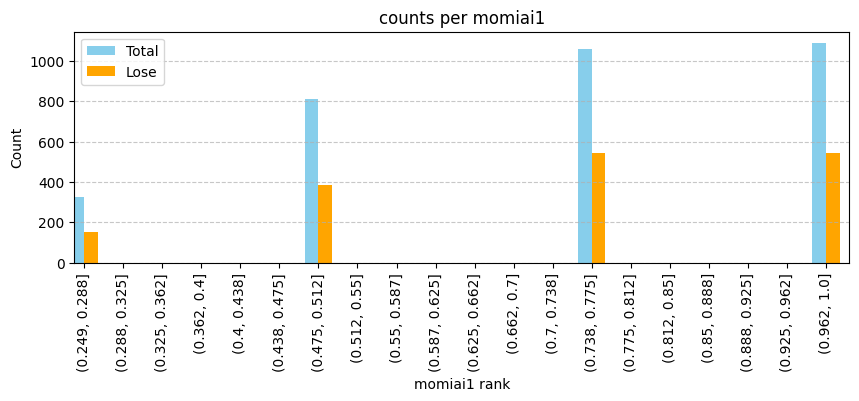

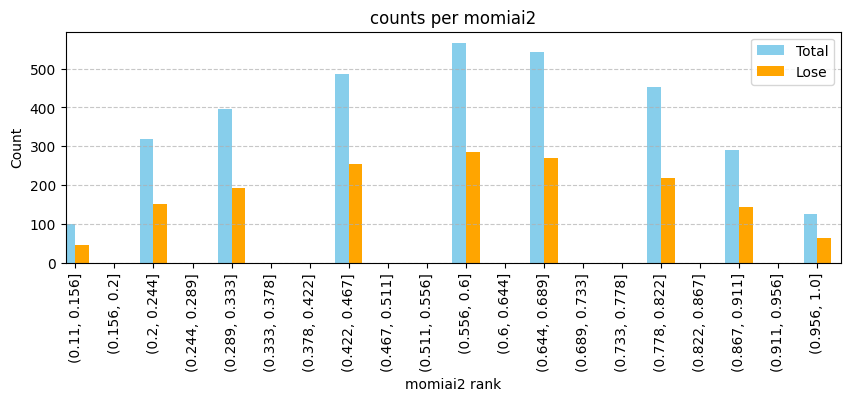

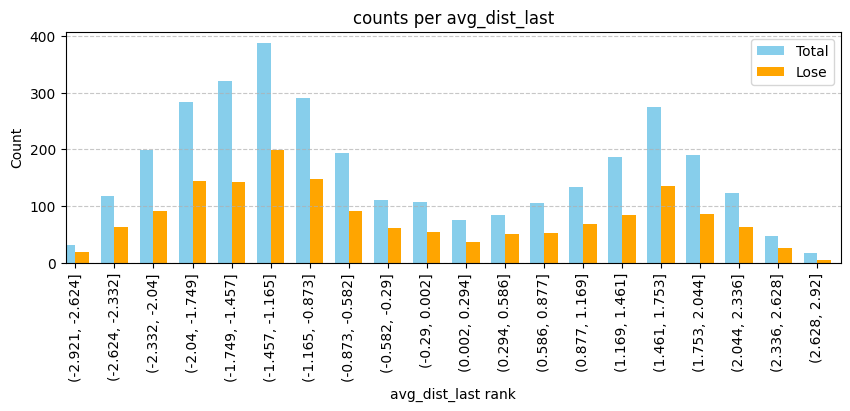

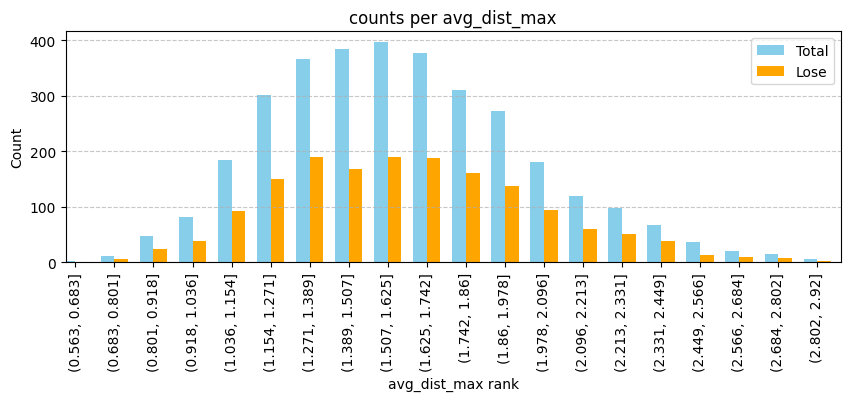

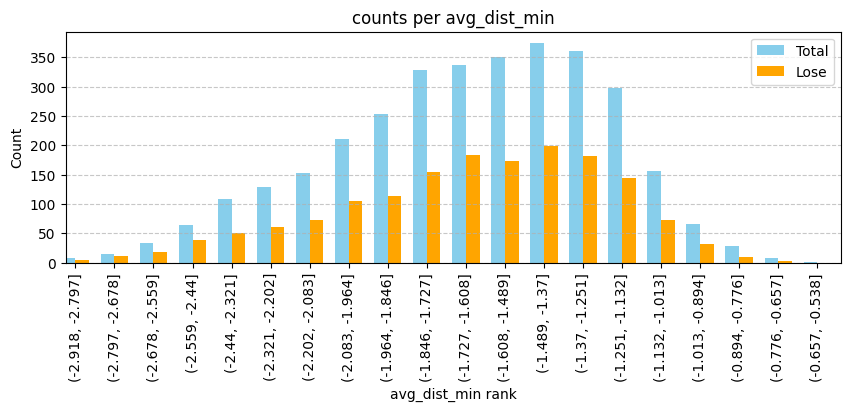

In [6]:
for item in ['peak_broken_rate','mado','acc','trend_rate',
                  'chiko','len_std','hara_rate','up_hige_rate',
                  'dw_hige_rate','reversed_rate','momiai1', 'momiai2', 
                  'avg_dist_last', 'avg_dist_max', 'avg_dist_min']:

    # Rank the trend_rate column
    #df['rank'] = df['trend_rate'].rank(method='min')
    df['rank'] = pd.cut(df[item], bins=20)
    
    # Count occurrences of each rank
    total_rank_counts = df['rank'].value_counts().sort_index()
    
    # Filter DataFrame where result == -1 and count occurrences of each rank
    df_filtered = df[df['dir'] == -1]
    filtered_rank_counts = df_filtered['rank'].value_counts().sort_index()
    
    # Align both series to have the same index
    combined_counts = pd.concat([total_rank_counts, filtered_rank_counts], axis=1, keys=['Total', 'Lose']).fillna(0)
    
    # Plot the graph
    fig, ax = plt.subplots(figsize=(10, 3))
    width = 0.35  # the width of the bars
    
    # Plotting the total counts
    combined_counts['Total'].plot(kind='bar', color='skyblue', width=width, position=1, label='Total', ax=ax)
    
    # Plotting the counts where result == -1
    combined_counts['Lose'].plot(kind='bar', color='orange', width=width, position=0, label='Lose', ax=ax)
    
    plt.title('counts per %s' % item)
    plt.xlabel('%s rank' % item)
    plt.ylabel('Count')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend()
    
    plt.show()